Ivanna Herrera Ibarra 744614

21/02/25

# **Examen 1 práctico tipo 1**

In [903]:
import pandas as pd
from sklearn import linear_model
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso
import statsmodels.formula.api as smf

In [904]:
from google.colab import drive
drive.mount('/content/drive')

data_path = '/content/drive/MyDrive/Colab Notebooks/'
df = pd.read_csv(data_path + "Boston.csv")
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


In [905]:
df = df.drop(columns = ['Unnamed: 0'])
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


In [906]:
df = pd.get_dummies(df, columns = ['rad'])
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,tax,ptratio,...,medv,rad_1,rad_2,rad_3,rad_4,rad_5,rad_6,rad_7,rad_8,rad_24
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,296,15.3,...,24.0,True,False,False,False,False,False,False,False,False
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,242,17.8,...,21.6,False,True,False,False,False,False,False,False,False
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,242,17.8,...,34.7,False,True,False,False,False,False,False,False,False
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,222,18.7,...,33.4,False,False,True,False,False,False,False,False,False
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,222,18.7,...,36.2,False,False,True,False,False,False,False,False,False


In [907]:
df.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'tax',
       'ptratio', 'lstat', 'medv', 'rad_1', 'rad_2', 'rad_3', 'rad_4', 'rad_5',
       'rad_6', 'rad_7', 'rad_8', 'rad_24'],
      dtype='object')

In [908]:
## Crea una función de calibracion
def calibracion(predicciones, y, bins):
  df_calibracion = pd.DataFrame({'predicciones': predicciones, 'y': y})

  df_calibracion['bins'] = pd.qcut(df_calibracion['predicciones'], q=bins, labels=False) + 1
  grouped = df_calibracion.groupby('bins').mean()

  plt.plot(grouped.predicciones, grouped.y, label="Modelo", marker="o")
  plt.plot(grouped.predicciones, grouped.predicciones, label="Real", marker="o")
  plt.grid()
  plt.legend()
  plt.xlabel("Predicción")
  plt.ylabel("Real")
  plt.show()

### Modelo con regresión lineal múltiple

In [909]:
X = df.drop(columns=['medv'])
target = 'medv'

# Define X, y
X = df.copy()
X = X.drop(target, axis=1)
y = df[target]

# División en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Entrenar modelo con interacciones
model = linear_model.LinearRegression().fit(X_train, y_train)

# Predicciones y r2, cuida el nombre de la prediccion
predicciones_lineal = model.predict(X_test)
print(round(r2_score(y_pred=predicciones_lineal, y_true=y_test), 4))

0.7211


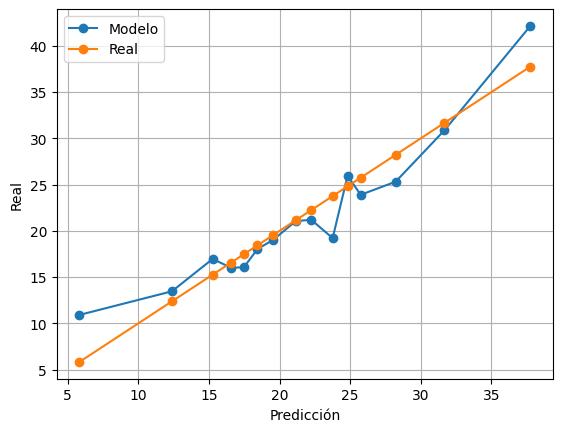

In [910]:
calibracion(predicciones_lineal, y_test, 15)

### Modelo con regresión polinomial de grado 2

In [911]:
degree = 2

# Ridge

# Aplicar StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X)
X_scaled = scaler.transform(X)

# Features polinomiales
poly_features = PolynomialFeatures(degree=degree)
X_poly = poly_features.fit_transform(X_scaled)

# Crossvalidation
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.3, random_state=42)

# Ajustar el modelo de regresión Lasso o ridge
model = linear_model.Ridge().fit(X_train, y_train)

# Predicciones y r2, cuida el nombre de la prediccion
predicciones_poly2 = model.predict(X_test)
print(round(r2_score(y_pred=predicciones_poly2, y_true=y_test), 4))

0.8122


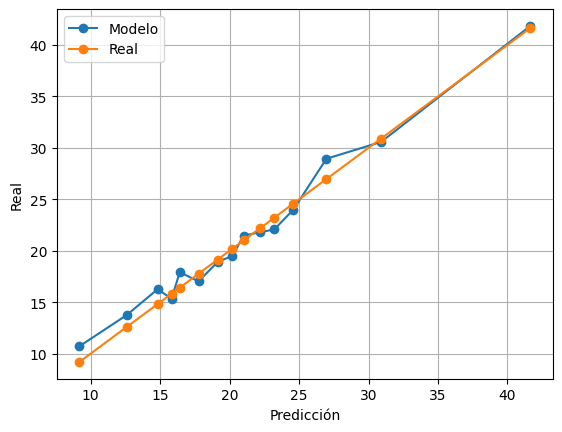

In [912]:
calibracion(predicciones_poly2, y_test, 15)

In [913]:
degree = 2

# Lasso

# Aplicar StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X)
X_scaled = scaler.transform(X)

# Features polinomiales
poly_features = PolynomialFeatures(degree=degree)
X_poly = poly_features.fit_transform(X_scaled)

# Crossvalidation
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.3, random_state=42)

# Ajustar el modelo de regresión Lasso o ridge
model = linear_model.Lasso().fit(X_train, y_train)

# Predicciones y r2, cuida el nombre de la prediccion
predicciones_poly2 = model.predict(X_test)
print(round(r2_score(y_pred=predicciones_poly2, y_true=y_test), 4))

0.7539


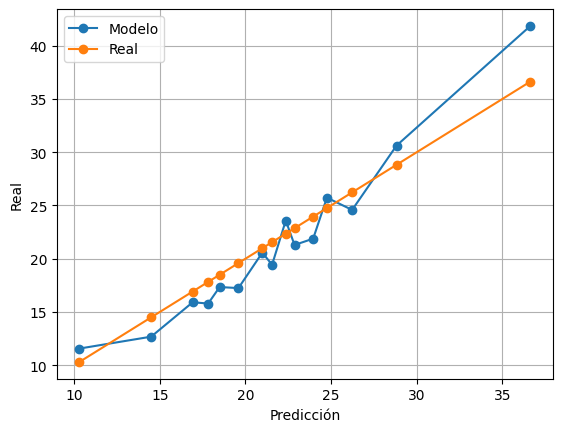

In [914]:
calibracion(predicciones_poly2, y_test, 15)

### Modelo con regresión polinomial de grado 3

In [915]:
degree = 3

# Ridge

# Aplicar StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X)
X_scaled = scaler.transform(X)

# Features polinomiales
poly_features = PolynomialFeatures(degree=degree)
X_poly = poly_features.fit_transform(X_scaled)

# Crossvalidation
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.3, random_state=42)

# Ajustar el modelo de regresión Lasso o ridge
model = linear_model.Ridge().fit(X_train, y_train)

# Predicciones y r2, cuida el nombre de la prediccion
predicciones_poly3 = model.predict(X_test)
print(round(r2_score(y_pred=predicciones_poly3, y_true=y_test), 4))

-0.0715


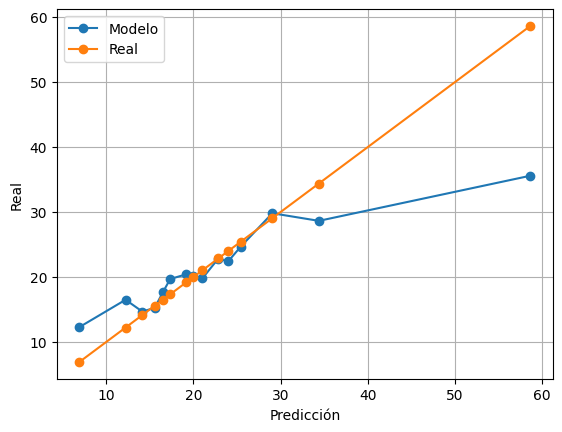

In [916]:
calibracion(predicciones_poly3, y_test, 15)

In [917]:
degree = 3

# Lasso

# Aplicar StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X)
X_scaled = scaler.transform(X)

# Features polinomiales
poly_features = PolynomialFeatures(degree=degree)
X_poly = poly_features.fit_transform(X_scaled)

# Crossvalidation
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.3, random_state=42)

# Ajustar el modelo de regresión Lasso o ridge
model = linear_model.Lasso().fit(X_train, y_train)

# Predicciones y r2, cuida el nombre de la prediccion
predicciones_poly3 = model.predict(X_test)
print(round(r2_score(y_pred=predicciones_poly3, y_true=y_test), 4))

0.7287


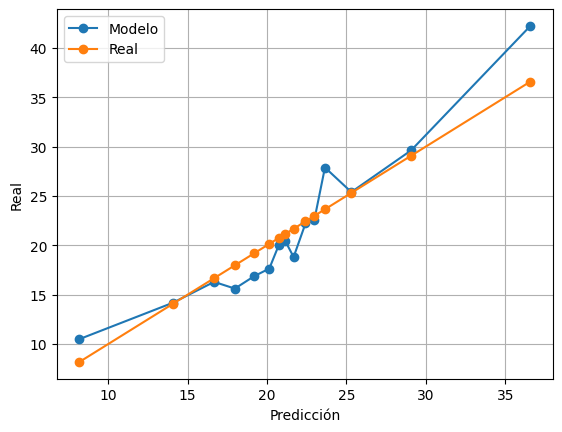

In [918]:
calibracion(predicciones_poly3, y_test, 15)

### KNN

In [919]:
X = df.copy()
X = X.drop(target, axis=1)
y = df[target]

# División en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = KNeighborsRegressor().fit(X_train_scaled, y_train)
predicciones = model.predict(X_test_scaled)
print(round(r2_score(y_pred=predicciones, y_true=y_test), 4))

0.6562


In [920]:
nn = []
r2 = []
r2_train = []
for i in range(1,60):
  model = KNeighborsRegressor(n_neighbors=i).fit(X_train_scaled, y_train)
  predicciones = model.predict(X_test_scaled)
  r2.append(r2_score(y_pred=predicciones, y_true=y_test))
  nn.append(i)
  predicciones_train = model.predict(X_train_scaled)
  r2_train.append(r2_score(y_pred=predicciones_train, y_true=y_train))

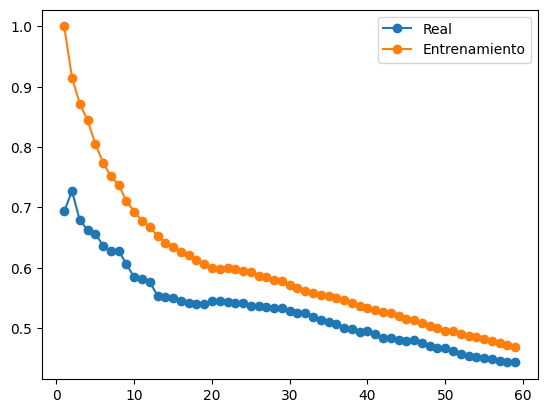

In [921]:
resultados = pd.DataFrame({'nn':nn, 'r2':r2, 'r2_train':r2_train})
plt.plot(resultados.nn, resultados.r2, marker="o", label="Real")
plt.plot(resultados.nn, resultados.r2_train, marker="o", label="Entrenamiento")
plt.legend()
plt.show()

In [922]:
resultados[resultados.r2 == resultados.r2.max()]

,nn,r2,r2_train
1,2,0.727218,0.914565


### Regresión OLS

In [923]:
model = smf.ols('medv ~ crim + zn + chas + nox + rm + dis + tax + ptratio + lstat + rad_3 + rad_4 + rad_5 + rad_7 + rad_8 + rad_24', data=df).fit()
model.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,41.7323,5.082,8.212,0.000,31.747,51.718
rad_3[T.True],3.6712,0.988,3.716,0.000,1.730,5.613
rad_4[T.True],1.6252,0.758,2.143,0.033,0.135,3.115
rad_5[T.True],1.8333,0.768,2.386,0.017,0.324,3.343
rad_7[T.True],3.9458,1.317,2.995,0.003,1.358,6.534
rad_8[T.True],3.7931,1.173,3.233,0.001,1.488,6.098
rad_24[T.True],6.0159,1.434,4.195,0.000,3.198,8.834
crim,-0.1233,0.033,-3.769,0.000,-0.188,-0.059
zn,0.0533,0.014,3.816,0.000,0.026,0.081
chas,2.6619,0.863,3.085,0.002,0.967,4.357


In [924]:
X_ols = X[['crim', 'zn', 'chas', 'nox', 'rm', 'dis', 'tax', 'ptratio', 'lstat', 'rad_3', 'rad_4', 'rad_5', 'rad_7', 'rad_8', 'rad_24']]

#### Modelo con regresión lineal múltiple OLS

In [925]:
# División en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_ols, y, test_size=0.3, random_state=42)

# Entrenar modelo con interacciones
model = linear_model.LinearRegression().fit(X_train, y_train)

# Predicciones y r2, cuida el nombre de la prediccion
predicciones_lineal = model.predict(X_test)
print(round(r2_score(y_pred=predicciones_lineal, y_true=y_test), 4))

0.7244


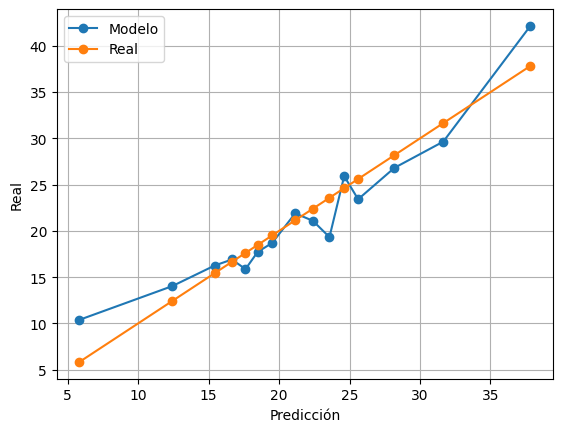

In [926]:
calibracion(predicciones_lineal, y_test, 15)

#### Modelo con regresión polinomial de grado 2 OLS

In [927]:
degree = 2

# Ridge

# Aplicar StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_ols)
X_scaled = scaler.transform(X_ols)

# Features polinomiales
poly_features = PolynomialFeatures(degree=degree)
X_poly = poly_features.fit_transform(X_scaled)

# Crossvalidation
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.3, random_state=42)

# Ajustar el modelo de regresión Lasso o ridge
model = linear_model.Ridge().fit(X_train, y_train)

# Predicciones y r2, cuida el nombre de la prediccion
predicciones_poly2 = model.predict(X_test)
print(round(r2_score(y_pred=predicciones_poly2, y_true=y_test), 4))

0.8108


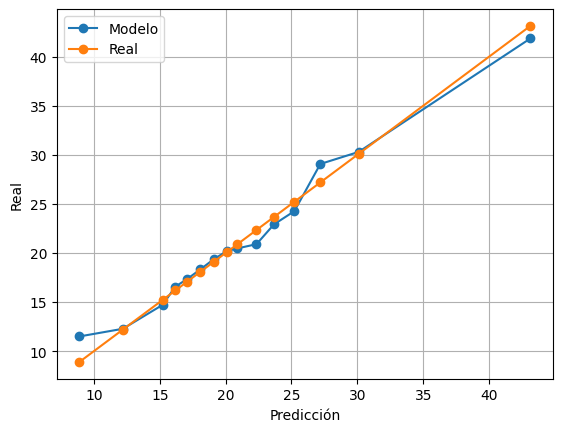

In [928]:
calibracion(predicciones_poly2, y_test, 15)

In [929]:
degree = 2

# Lasso

# Aplicar StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_ols)
X_scaled = scaler.transform(X_ols)

# Features polinomiales
poly_features = PolynomialFeatures(degree=degree)
X_poly = poly_features.fit_transform(X_scaled)

# Crossvalidation
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.3, random_state=42)

# Ajustar el modelo de regresión Lasso o ridge
model = linear_model.Lasso().fit(X_train, y_train)

# Predicciones y r2, cuida el nombre de la prediccion
predicciones_poly2 = model.predict(X_test)
print(round(r2_score(y_pred=predicciones_poly2, y_true=y_test), 4))

0.7526


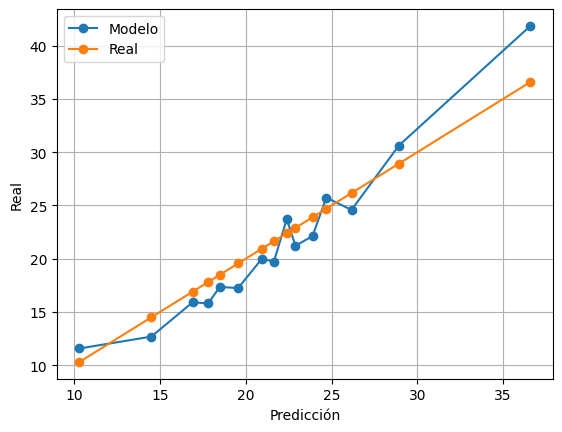

In [930]:
calibracion(predicciones_poly2, y_test, 15)

#### Modelo con regresión polinomial de grado 3 OLS

In [931]:
degree = 3

# Ridge

# Aplicar StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_ols)
X_scaled = scaler.transform(X_ols)

# Features polinomiales
poly_features = PolynomialFeatures(degree=degree)
X_poly = poly_features.fit_transform(X_scaled)

# Crossvalidation
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.3, random_state=42)

# Ajustar el modelo de regresión Lasso o ridge
model = linear_model.Ridge().fit(X_train, y_train)

# Predicciones y r2, cuida el nombre de la prediccion
predicciones_poly3 = model.predict(X_test)
print(round(r2_score(y_pred=predicciones_poly3, y_true=y_test), 4))

0.2959


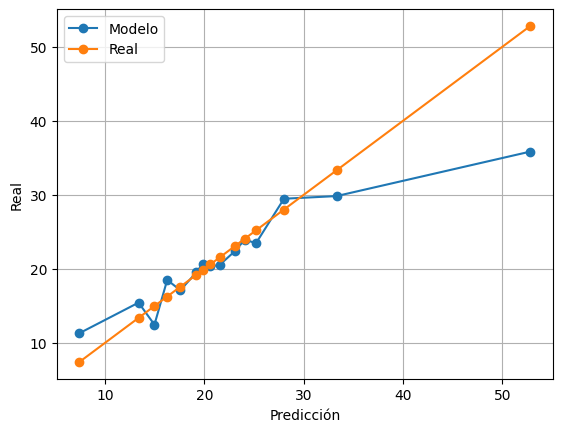

In [932]:
calibracion(predicciones_poly3, y_test, 15)

In [933]:
degree = 3

# Lasso

# Aplicar StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_ols)
X_scaled = scaler.transform(X_ols)

# Features polinomiales
poly_features = PolynomialFeatures(degree=degree)
X_poly = poly_features.fit_transform(X_scaled)

# Crossvalidation
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.3, random_state=42)

# Ajustar el modelo de regresión Lasso o ridge
model = linear_model.Lasso().fit(X_train, y_train)

# Predicciones y r2, cuida el nombre de la prediccion
predicciones_poly3 = model.predict(X_test)
print(round(r2_score(y_pred=predicciones_poly3, y_true=y_test), 4))

0.7688


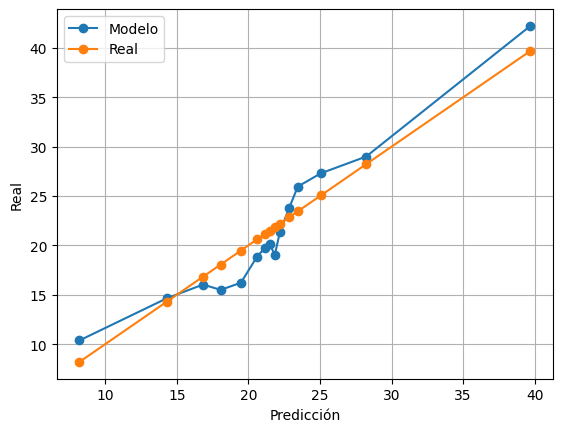

In [934]:
calibracion(predicciones_poly3, y_test, 15)

#### KNN OLS

In [935]:
# División en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_ols, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = KNeighborsRegressor().fit(X_train_scaled, y_train)
predicciones = model.predict(X_test_scaled)
print(round(r2_score(y_pred=predicciones, y_true=y_test), 4))

0.6798


In [936]:
nn = []
r2 = []
r2_train = []
for i in range(1,60):
  model = KNeighborsRegressor(n_neighbors=i).fit(X_train_scaled, y_train)
  predicciones = model.predict(X_test_scaled)
  r2.append(r2_score(y_pred=predicciones, y_true=y_test))
  nn.append(i)
  predicciones_train = model.predict(X_train_scaled)
  r2_train.append(r2_score(y_pred=predicciones_train, y_true=y_train))

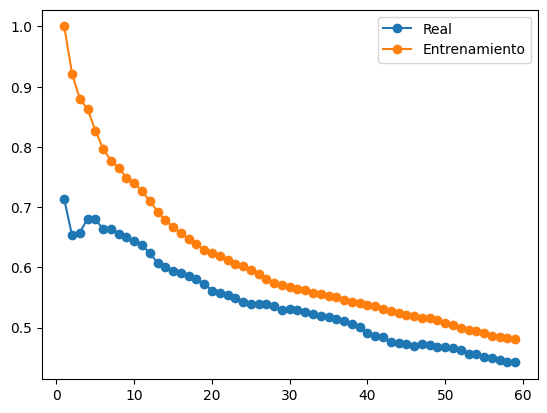

In [937]:
resultados = pd.DataFrame({'nn':nn, 'r2':r2, 'r2_train':r2_train})
plt.plot(resultados.nn, resultados.r2, marker="o", label="Real")
plt.plot(resultados.nn, resultados.r2_train, marker="o", label="Entrenamiento")
plt.legend()
plt.show()

In [938]:
resultados[resultados.r2 == resultados.r2.max()]

,nn,r2,r2_train
0,1,0.712641,1.0


### Feature engenieering

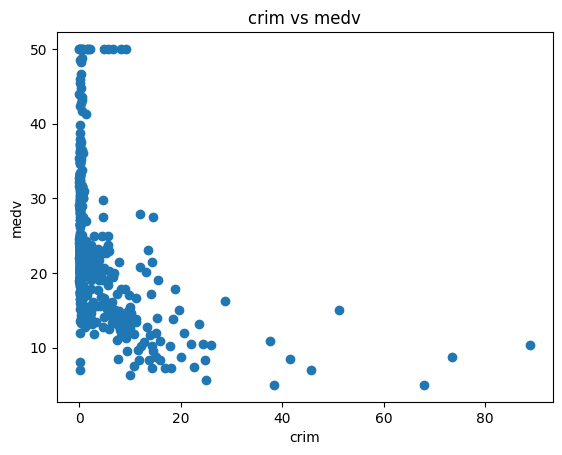

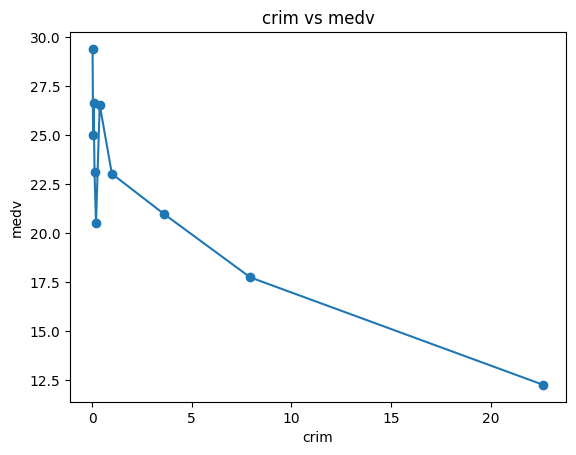

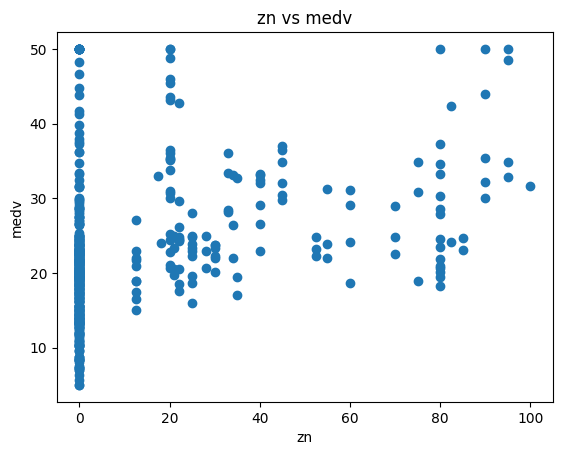

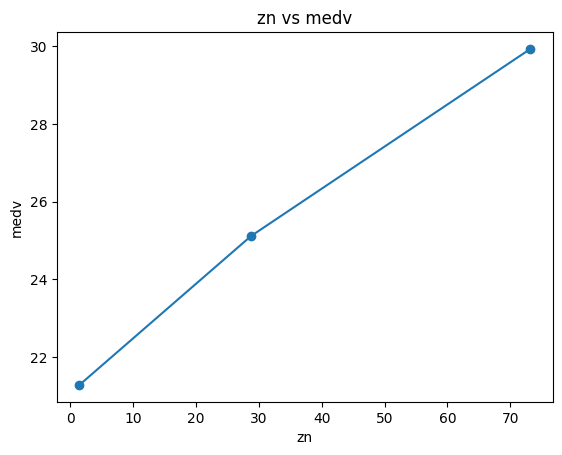

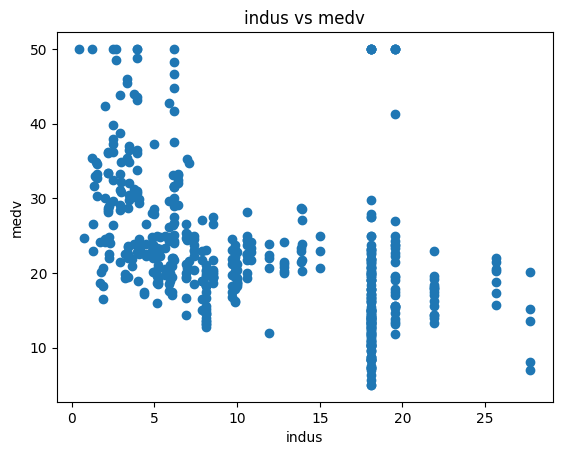

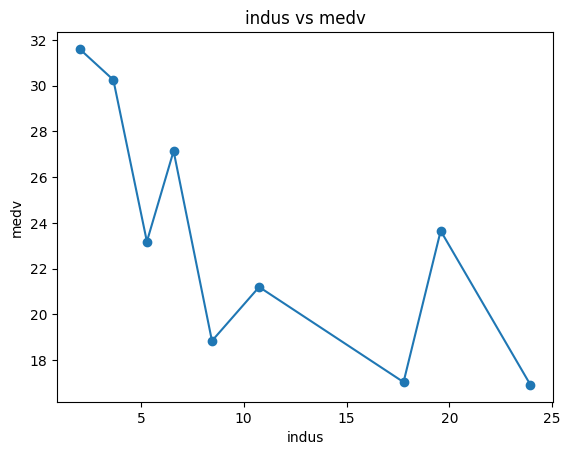

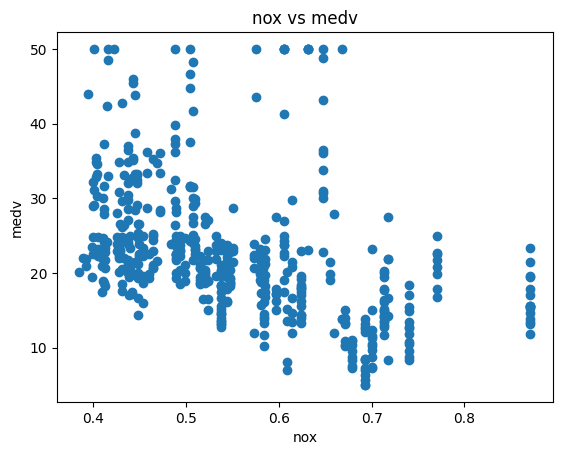

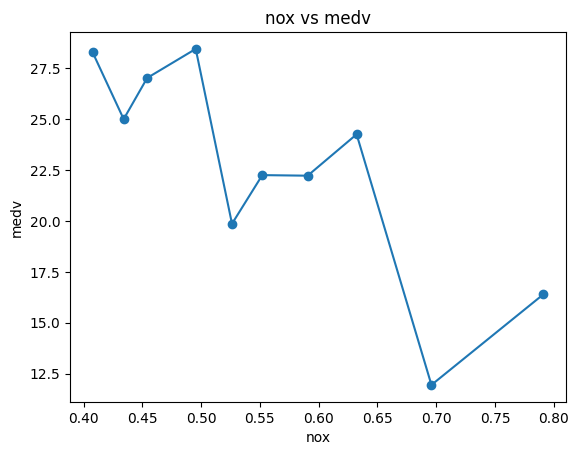

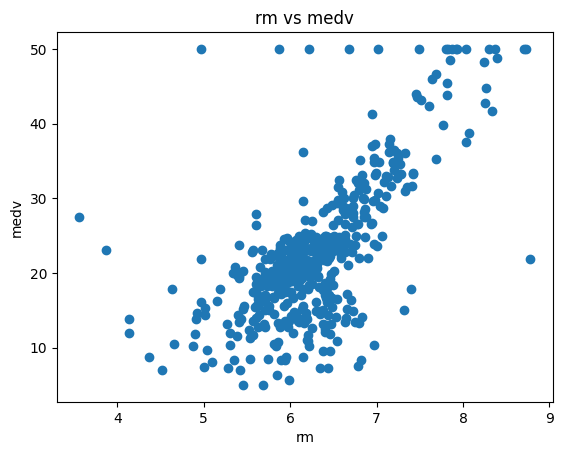

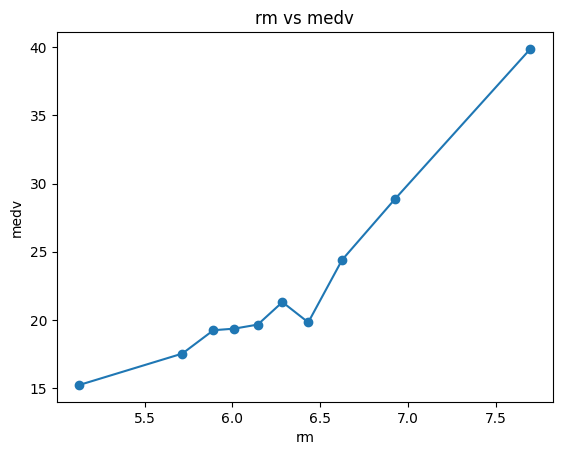

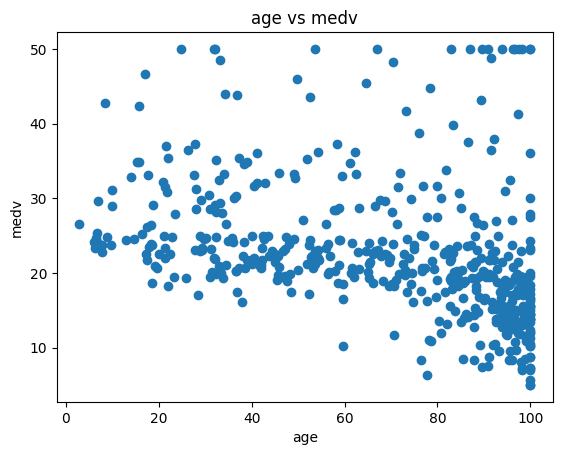

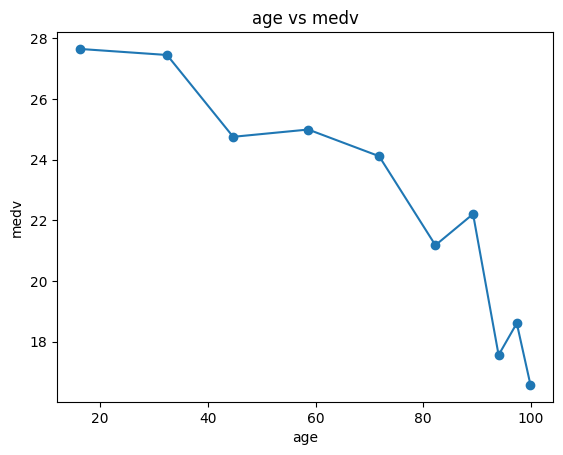

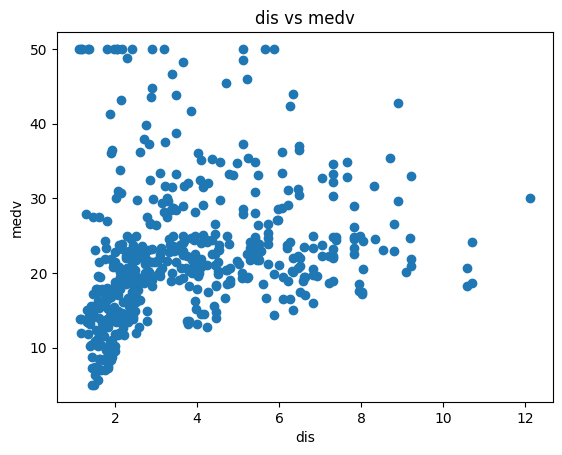

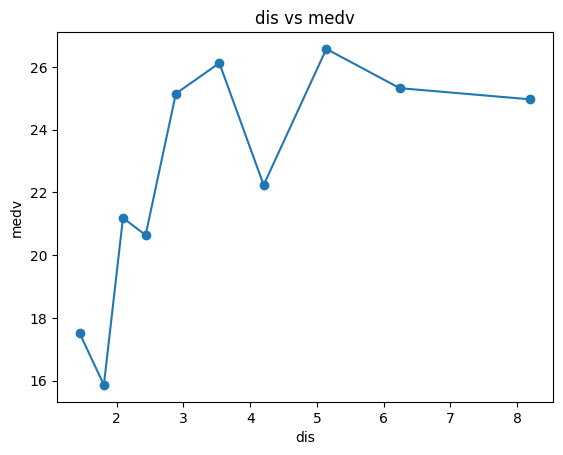

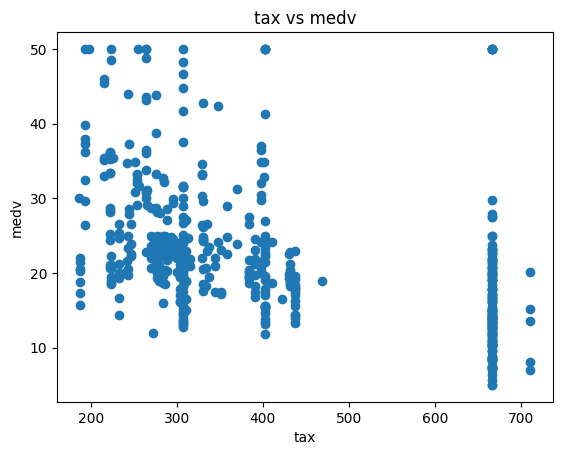

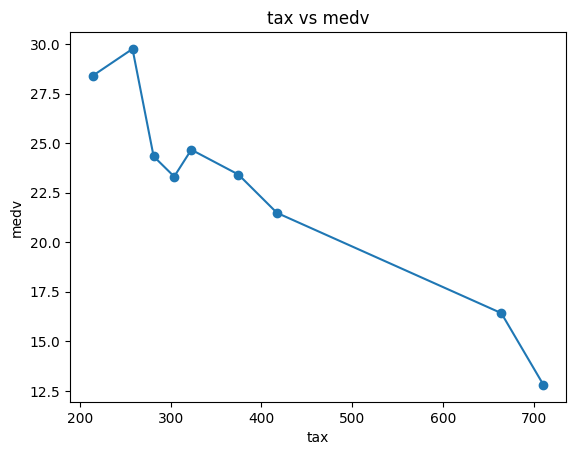

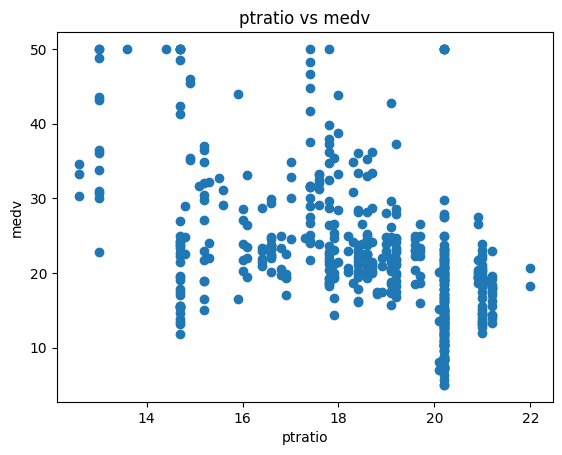

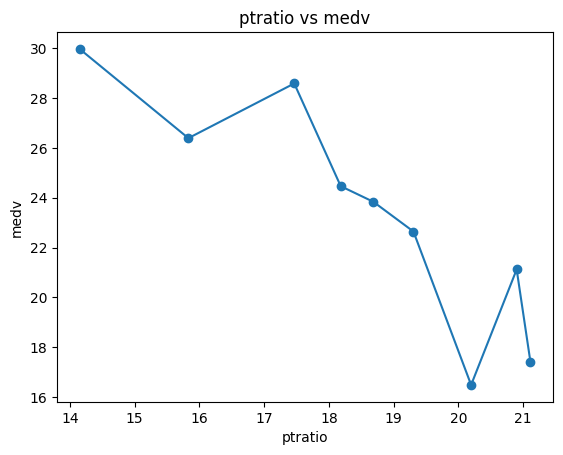

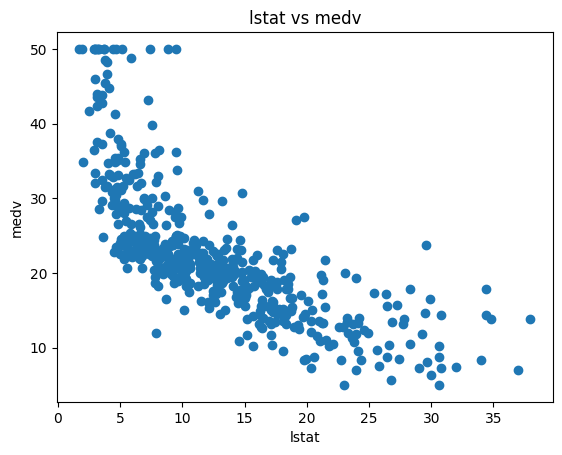

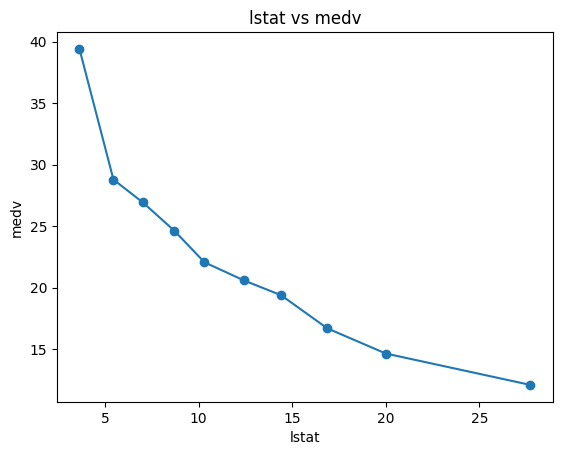

In [939]:
num_features = ['crim', 'zn', 'indus', 'nox', 'rm', 'age', 'dis', 'tax', 'ptratio', 'lstat']
target = 'medv'

for feature in num_features:
    plt.scatter(df[feature], df[target])
    plt.title(f"{feature} vs {target}")
    plt.xlabel(feature)
    plt.ylabel(target)
    plt.show()

    df[f'{feature}_bin'] = pd.qcut(df[feature], q=10, labels=False, duplicates='drop') + 1
    grouped_rooms = df.groupby(f'{feature}_bin').mean()

    plt.plot(grouped_rooms[feature].values, grouped_rooms[target].values, marker="o")
    plt.title(f"{feature} vs {target}")
    plt.xlabel(feature)
    plt.ylabel(target)
    plt.show()

In [940]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,tax,ptratio,...,crim_bin,zn_bin,indus_bin,nox_bin,rm_bin,age_bin,dis_bin,tax_bin,ptratio_bin,lstat_bin
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,296,15.3,...,1,1,1,5,8,4,7,4,2,2
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,242,17.8,...,1,1,4,3,7,6,8,2,3,4
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,242,17.8,...,1,1,4,3,10,4,8,2,3,1
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,222,18.7,...,1,1,1,3,9,3,9,1,5,1
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,222,18.7,...,3,1,1,3,9,4,9,1,5,2


In [941]:
df['indus_per_dis'] = df['indus'] / df['dis']
df['log_nox'] = np.log(df['nox'])
df['log_lstat'] = np.log(df['lstat'])
df['log_dis'] = np.log(df['dis'])
df['sqrt_tax'] = np.sqrt(df['tax'])
df['rm_squared'] = df['rm'] ** 2
df['age_squared'] = df['age'] ** 2

#### Regresión lineal múltiple feature engenieering

In [942]:
X = df.drop(columns=['medv'])
target = 'medv'

# Define X, y
X = df.copy()
X = X.drop(target, axis=1)
y = df[target]

# División en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Entrenar modelo con interacciones
model = linear_model.LinearRegression().fit(X_train, y_train)

# Predicciones y r2, cuida el nombre de la prediccion
predicciones_lineal = model.predict(X_test)
print(round(r2_score(y_pred=predicciones_lineal, y_true=y_test), 4))

0.8338


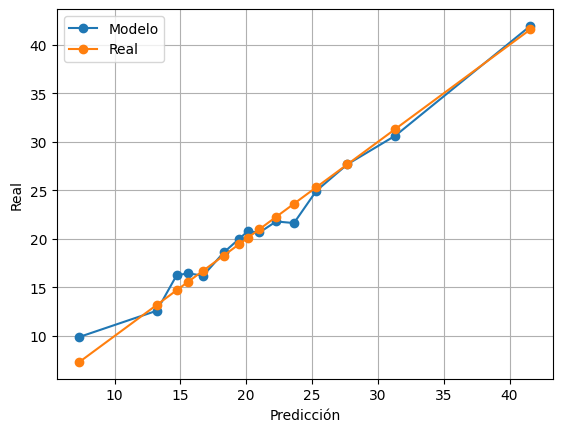

In [943]:
calibracion(predicciones_lineal, y_test, 15)

#### Regresión polinomial grado 2 feature engenieering

In [944]:
degree = 2

# Ridge

# Aplicar StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X)
X_scaled = scaler.transform(X)

# Features polinomiales
poly_features = PolynomialFeatures(degree=degree)
X_poly = poly_features.fit_transform(X_scaled)

# Crossvalidation
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.3, random_state=42)

# Ajustar el modelo de regresión Lasso o ridge
model = linear_model.Ridge().fit(X_train, y_train)

# Predicciones y r2, cuida el nombre de la prediccion
predicciones_poly2 = model.predict(X_test)
print(round(r2_score(y_pred=predicciones_poly2, y_true=y_test), 4))

0.8683


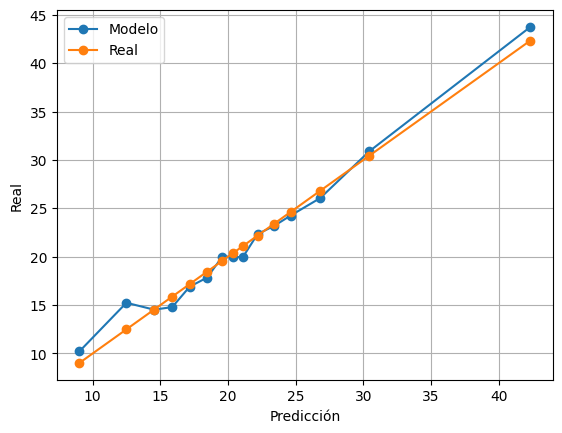

In [945]:
calibracion(predicciones_poly2, y_test, 15)

In [946]:
degree = 2

# Lasso

# Aplicar StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X)
X_scaled = scaler.transform(X)

# Features polinomiales
poly_features = PolynomialFeatures(degree=degree)
X_poly = poly_features.fit_transform(X_scaled)

# Crossvalidation
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.3, random_state=42)

# Ajustar el modelo de regresión Lasso o ridge
model = linear_model.Lasso().fit(X_train, y_train)

# Predicciones y r2, cuida el nombre de la prediccion
predicciones_poly2 = model.predict(X_test)
print(round(r2_score(y_pred=predicciones_poly2, y_true=y_test), 4))

0.764


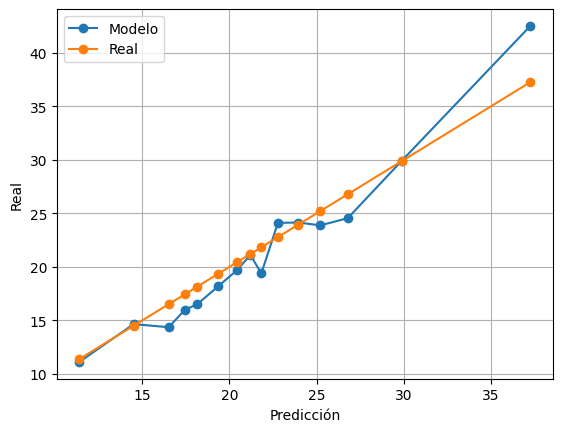

In [947]:
calibracion(predicciones_poly2, y_test, 15)

#### Regresión polinomial grado 3 feature engenieering

In [948]:
degree = 3

# Ridge

# Aplicar StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X)
X_scaled = scaler.transform(X)

# Features polinomiales
poly_features = PolynomialFeatures(degree=degree)
X_poly = poly_features.fit_transform(X_scaled)

# Crossvalidation
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.3, random_state=42)

# Ajustar el modelo de regresión Lasso o ridge
model = linear_model.Ridge().fit(X_train, y_train)

# Predicciones y r2, cuida el nombre de la prediccion
predicciones_poly3 = model.predict(X_test)
print(round(r2_score(y_pred=predicciones_poly3, y_true=y_test), 4))

0.7044


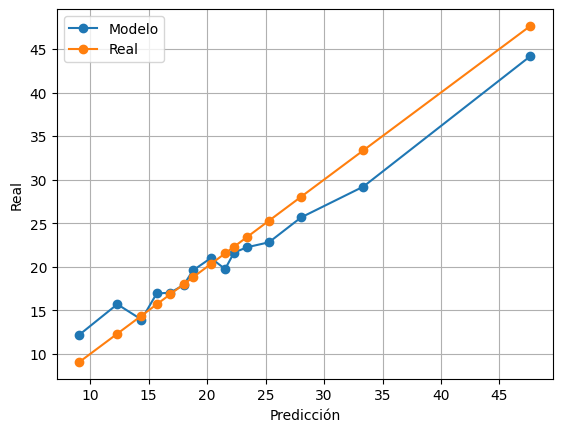

In [949]:
calibracion(predicciones_poly3, y_test, 15)

In [950]:
degree = 3

# Lasso

# Aplicar StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X)
X_scaled = scaler.transform(X)

# Features polinomiales
poly_features = PolynomialFeatures(degree=degree)
X_poly = poly_features.fit_transform(X_scaled)

# Crossvalidation
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.3, random_state=42)

# Ajustar el modelo de regresión Lasso o ridge
model = linear_model.Lasso().fit(X_train, y_train)

# Predicciones y r2, cuida el nombre de la prediccion
predicciones_poly3 = model.predict(X_test)
print(round(r2_score(y_pred=predicciones_poly3, y_true=y_test), 4))

0.775


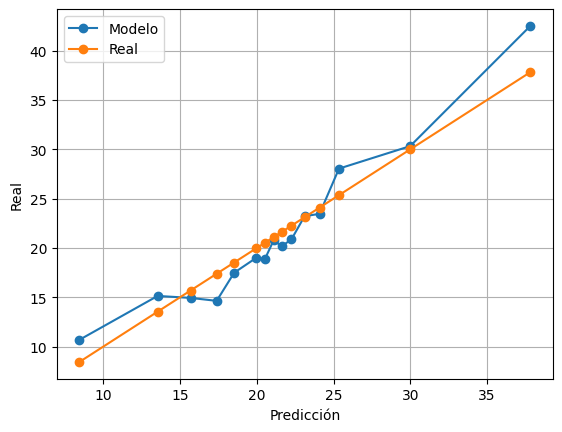

In [951]:
calibracion(predicciones_poly3, y_test, 15)

#### KNN feature engenieering

In [952]:
X = df.copy()
X = X.drop(target, axis=1)
y = df[target]

# División en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = KNeighborsRegressor().fit(X_train_scaled, y_train)
predicciones = model.predict(X_test_scaled)
print(round(r2_score(y_pred=predicciones, y_true=y_test), 4))

0.6585


In [953]:
nn = []
r2 = []
r2_train = []
for i in range(1,60):
  model = KNeighborsRegressor(n_neighbors=i).fit(X_train_scaled, y_train)
  predicciones = model.predict(X_test_scaled)
  r2.append(r2_score(y_pred=predicciones, y_true=y_test))
  nn.append(i)
  predicciones_train = model.predict(X_train_scaled)
  r2_train.append(r2_score(y_pred=predicciones_train, y_true=y_train))

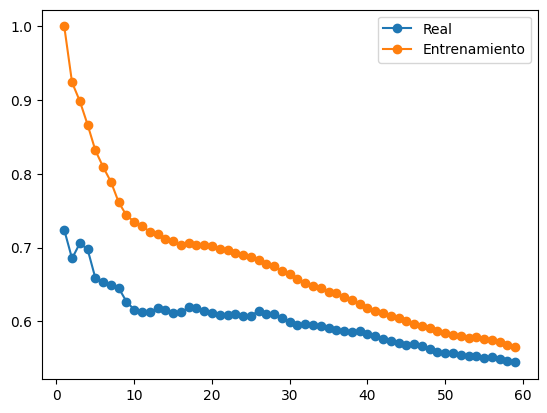

In [954]:
resultados = pd.DataFrame({'nn':nn, 'r2':r2, 'r2_train':r2_train})
plt.plot(resultados.nn, resultados.r2, marker="o", label="Real")
plt.plot(resultados.nn, resultados.r2_train, marker="o", label="Entrenamiento")
plt.legend()
plt.show()

In [955]:
resultados[resultados.r2 == resultados.r2.max()]

,nn,r2,r2_train
0,1,0.723759,1.0


### Transformar numéricos a categóricos

In [956]:
numerical_features = ['crim', 'zn', 'indus', 'nox', 'rm', 'age', 'dis', 'tax', 'lstat', 'indus_per_dis', 'log_nox', 'log_lstat', 'log_dis', 'sqrt_tax', 'rm_squared', 'age_squared']

In [957]:
# División en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Crea funcion bins para las variables numericas
def create_bins(X, numeric_vars, bins):
  for var in numeric_vars:
    X[f'{var}_bin'] = pd.qcut(X[var], q=bins, labels=False, duplicates='drop') + 1
  return X

# Aplica la foruma de bins a x_trian y x_test
X_train = create_bins(X_train, numerical_features, 5)
X_test = create_bins(X_test, numerical_features, 5)

# Bin features
bin_features = [i for i in X_train.keys() if '_bin' in i]
categorical_features = [i for i in X_train.keys() if '_bin' not in i]

# Final features
final_features = bin_features + categorical_features

# Apply get dummies to both pd.get_dummies(X_train[final_features], columns=bin_features, drop_first=True)
X_train = pd.get_dummies(X_train[final_features], columns=bin_features, drop_first=True)
X_test = pd.get_dummies(X_test[final_features], columns=bin_features, drop_first=True)

# Entrenar modelo con interacciones
model = linear_model.LinearRegression().fit(X_train, y_train)

predicciones_final = model.predict(X_test)
print(round(r2_score(y_pred=predicciones_final, y_true=y_test), 4))

0.8576


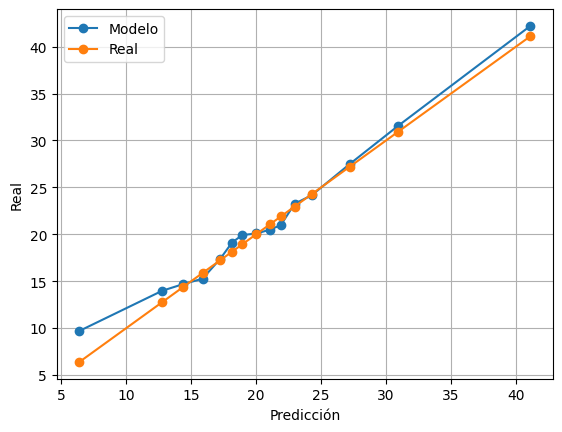

In [958]:
calibracion(predicciones_final, y_test, 15)

In [959]:
X.head()

,crim,zn,indus,chas,nox,rm,age,dis,tax,ptratio,...,tax_bin,ptratio_bin,lstat_bin,indus_per_dis,log_nox,log_lstat,log_dis,sqrt_tax,rm_squared,age_squared
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,296,15.3,...,4,2,2,0.564792,-0.619897,1.605430,1.408545,17.204651,43.230625,4251.04
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,242,17.8,...,2,3,4,1.423366,-0.757153,2.212660,1.602836,15.556349,41.229241,6225.21
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,242,17.8,...,2,3,1,1.423366,-0.757153,1.393766,1.602836,15.556349,51.624225,3733.21
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,222,18.7,...,1,5,1,0.359605,-0.780886,1.078410,1.802073,14.899664,48.972004,2097.64
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,222,18.7,...,1,5,2,0.359605,-0.780886,1.673351,1.802073,14.899664,51.079609,2937.64


In [960]:
X.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'tax',
       'ptratio', 'lstat', 'rad_1', 'rad_2', 'rad_3', 'rad_4', 'rad_5',
       'rad_6', 'rad_7', 'rad_8', 'rad_24', 'crim_bin', 'zn_bin', 'indus_bin',
       'nox_bin', 'rm_bin', 'age_bin', 'dis_bin', 'tax_bin', 'ptratio_bin',
       'lstat_bin', 'indus_per_dis', 'log_nox', 'log_lstat', 'log_dis',
       'sqrt_tax', 'rm_squared', 'age_squared'],
      dtype='object')

### Regresión OLS

In [961]:
model = smf.ols('medv ~ crim + chas + nox + rm + dis + tax + ptratio + rad_1 + rad_2 + rad_3 + rad_4 + rad_5 + rad_6 + rad_7 + rad_8 + rad_24 + nox_bin + rm_bin + dis_bin + tax_bin + ptratio_bin + log_nox + log_lstat + log_dis + sqrt_tax + rm_squared', data=df).fit()
model.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,229.8192,29.900,7.686,0.000,171.068,288.570
rad_1[T.True],22.5638,3.498,6.451,0.000,15.691,29.437
rad_2[T.True],23.3394,3.418,6.828,0.000,16.623,30.056
rad_3[T.True],26.0825,3.397,7.678,0.000,19.408,32.757
rad_4[T.True],25.1964,3.366,7.485,0.000,18.582,31.811
rad_5[T.True],24.9742,3.328,7.505,0.000,18.436,31.513
rad_6[T.True],25.5242,3.534,7.223,0.000,18.581,32.468
rad_7[T.True],26.1923,3.412,7.676,0.000,19.487,32.897
rad_8[T.True],25.5249,3.321,7.686,0.000,19.000,32.050
rad_24[T.True],30.4215,3.520,8.642,0.000,23.505,37.338


In [962]:
X_ols = X[['crim', 'chas', 'nox', 'rm', 'dis', 'tax', 'ptratio', 'rad_1', 'rad_2', 'rad_3', 'rad_4', 'rad_5', 'rad_6', 'rad_7', 'rad_8', 'rad_24', 'nox_bin', 'rm_bin', 'dis_bin', 'tax_bin', 'ptratio_bin', 'log_nox', 'log_lstat', 'log_dis', 'sqrt_tax', 'rm_squared']]

#### Modelo con regresión lineal múltiple OLS

In [963]:
# División en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_ols, y, test_size=0.3, random_state=42)

# Entrenar modelo con interacciones
model = linear_model.LinearRegression().fit(X_train, y_train)

# Predicciones y r2, cuida el nombre de la prediccion
predicciones_lineal = model.predict(X_test)
print(round(r2_score(y_pred=predicciones_lineal, y_true=y_test), 4))

0.8398


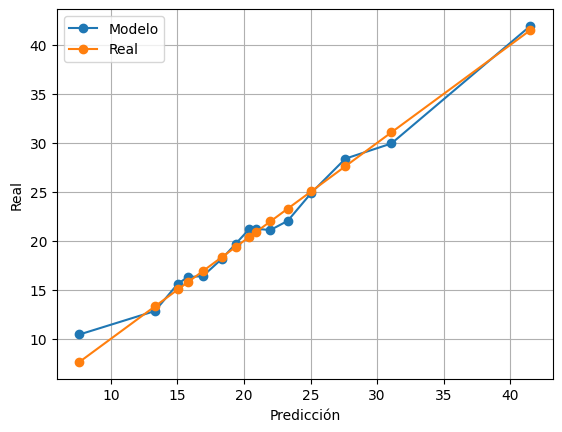

In [964]:
calibracion(predicciones_lineal, y_test, 15)

#### Modelo con regresión polinomial de grado 2 OLS

In [965]:
degree = 2

# Ridge

# Aplicar StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_ols)
X_scaled = scaler.transform(X_ols)

# Features polinomiales
poly_features = PolynomialFeatures(degree=degree)
X_poly = poly_features.fit_transform(X_scaled)

# Crossvalidation
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.3, random_state=42)

# Ajustar el modelo de regresión Lasso o ridge
model = linear_model.Ridge().fit(X_train, y_train)

# Predicciones y r2, cuida el nombre de la prediccion
predicciones_poly2 = model.predict(X_test)
print(round(r2_score(y_pred=predicciones_poly2, y_true=y_test), 4))

0.8351


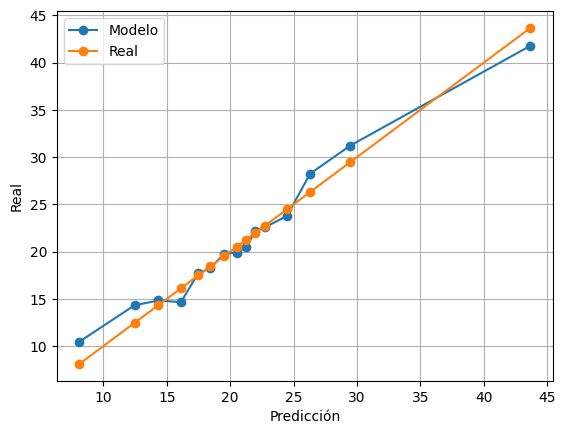

In [966]:
calibracion(predicciones_poly2, y_test, 15)

In [967]:
degree = 2

# Lasso

# Aplicar StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_ols)
X_scaled = scaler.transform(X_ols)

# Features polinomiales
poly_features = PolynomialFeatures(degree=degree)
X_poly = poly_features.fit_transform(X_scaled)

# Crossvalidation
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.3, random_state=42)

# Ajustar el modelo de regresión Lasso o ridge
model = linear_model.Lasso().fit(X_train, y_train)

# Predicciones y r2, cuida el nombre de la prediccion
predicciones_poly2 = model.predict(X_test)
print(round(r2_score(y_pred=predicciones_poly2, y_true=y_test), 4))

0.7602


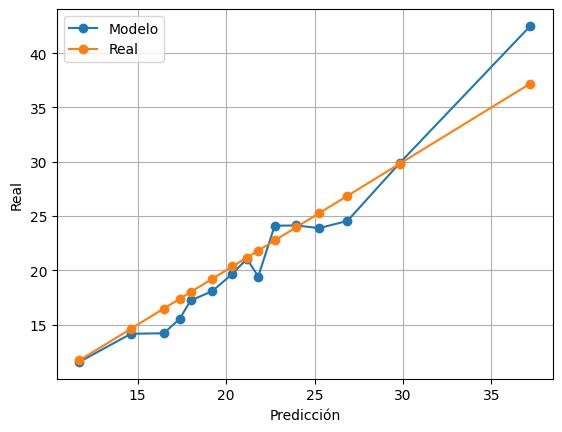

In [968]:
calibracion(predicciones_poly2, y_test, 15)

#### Modelo con regresión polinomial de grado 3 OLS

In [969]:
degree = 3

# Ridge

# Aplicar StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_ols)
X_scaled = scaler.transform(X_ols)

# Features polinomiales
poly_features = PolynomialFeatures(degree=degree)
X_poly = poly_features.fit_transform(X_scaled)

# Crossvalidation
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.3, random_state=42)

# Ajustar el modelo de regresión Lasso o ridge
model = linear_model.Ridge().fit(X_train, y_train)

# Predicciones y r2, cuida el nombre de la prediccion
predicciones_poly3 = model.predict(X_test)
print(round(r2_score(y_pred=predicciones_poly3, y_true=y_test), 4))

0.6506


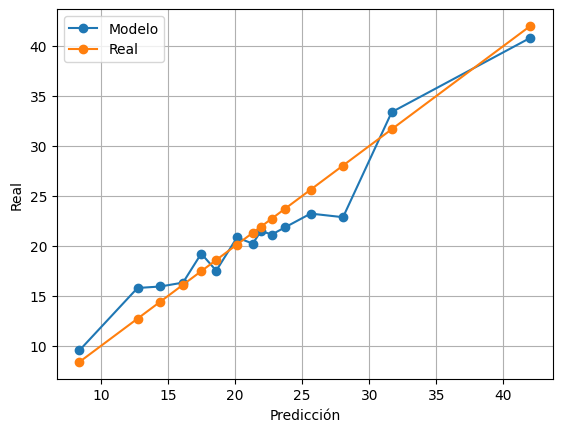

In [970]:
calibracion(predicciones_poly3, y_test, 15)

In [971]:
degree = 3

# Lasso

# Aplicar StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_ols)
X_scaled = scaler.transform(X_ols)

# Features polinomiales
poly_features = PolynomialFeatures(degree=degree)
X_poly = poly_features.fit_transform(X_scaled)

# Crossvalidation
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.3, random_state=42)

# Ajustar el modelo de regresión Lasso o ridge
model = linear_model.Lasso().fit(X_train, y_train)

# Predicciones y r2, cuida el nombre de la prediccion
predicciones_poly3 = model.predict(X_test)
print(round(r2_score(y_pred=predicciones_poly3, y_true=y_test), 4))

0.7717


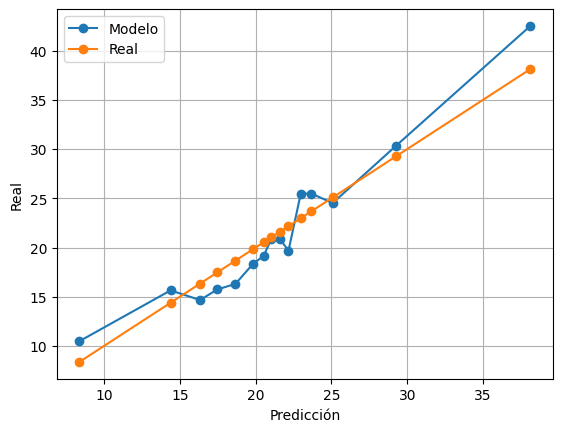

In [972]:
calibracion(predicciones_poly3, y_test, 15)

#### KNN OLS

In [973]:
# División en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_ols, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = KNeighborsRegressor().fit(X_train_scaled, y_train)
predicciones = model.predict(X_test_scaled)
print(round(r2_score(y_pred=predicciones, y_true=y_test), 4))

0.6174


In [974]:
nn = []
r2 = []
r2_train = []
for i in range(1,60):
  model = KNeighborsRegressor(n_neighbors=i).fit(X_train_scaled, y_train)
  predicciones = model.predict(X_test_scaled)
  r2.append(r2_score(y_pred=predicciones, y_true=y_test))
  nn.append(i)
  predicciones_train = model.predict(X_train_scaled)
  r2_train.append(r2_score(y_pred=predicciones_train, y_true=y_train))

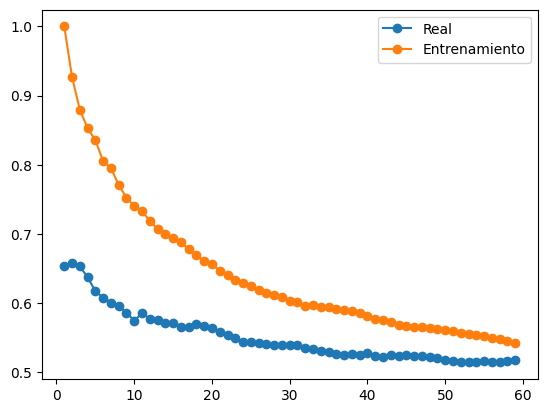

In [975]:
resultados = pd.DataFrame({'nn':nn, 'r2':r2, 'r2_train':r2_train})
plt.plot(resultados.nn, resultados.r2, marker="o", label="Real")
plt.plot(resultados.nn, resultados.r2_train, marker="o", label="Entrenamiento")
plt.legend()
plt.show()

In [976]:
resultados[resultados.r2 == resultados.r2.max()]

,nn,r2,r2_train
1,2,0.657579,0.926948


## **Mejor modelo**

#### Regresión polinomial grado 2 feature engenieering con Ridge

In [977]:
degree = 2

# Ridge

# Aplicar StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X)
X_scaled = scaler.transform(X)

# Features polinomiales
poly_features = PolynomialFeatures(degree=degree)
X_poly = poly_features.fit_transform(X_scaled)

# Crossvalidation
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.3, random_state=42)

# Ajustar el modelo de regresión Lasso o ridge
model = linear_model.Ridge().fit(X_train, y_train)

# Predicciones y r2, cuida el nombre de la prediccion
predicciones_poly2 = model.predict(X_test)
print(round(r2_score(y_pred=predicciones_poly2, y_true=y_test), 4))

0.8683


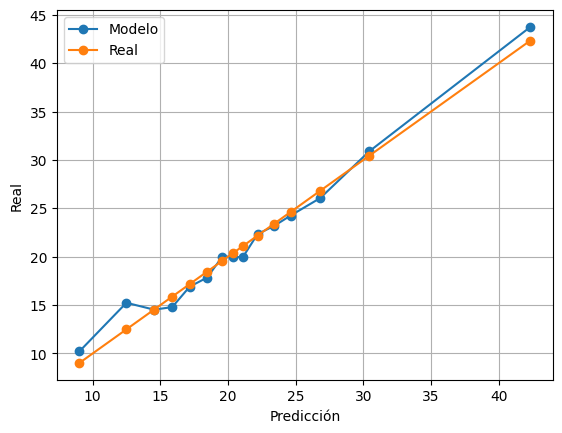

In [978]:
calibracion(predicciones_poly2, y_test, 15)